(3, 3, 999)


<IPython.core.display.Javascript object>


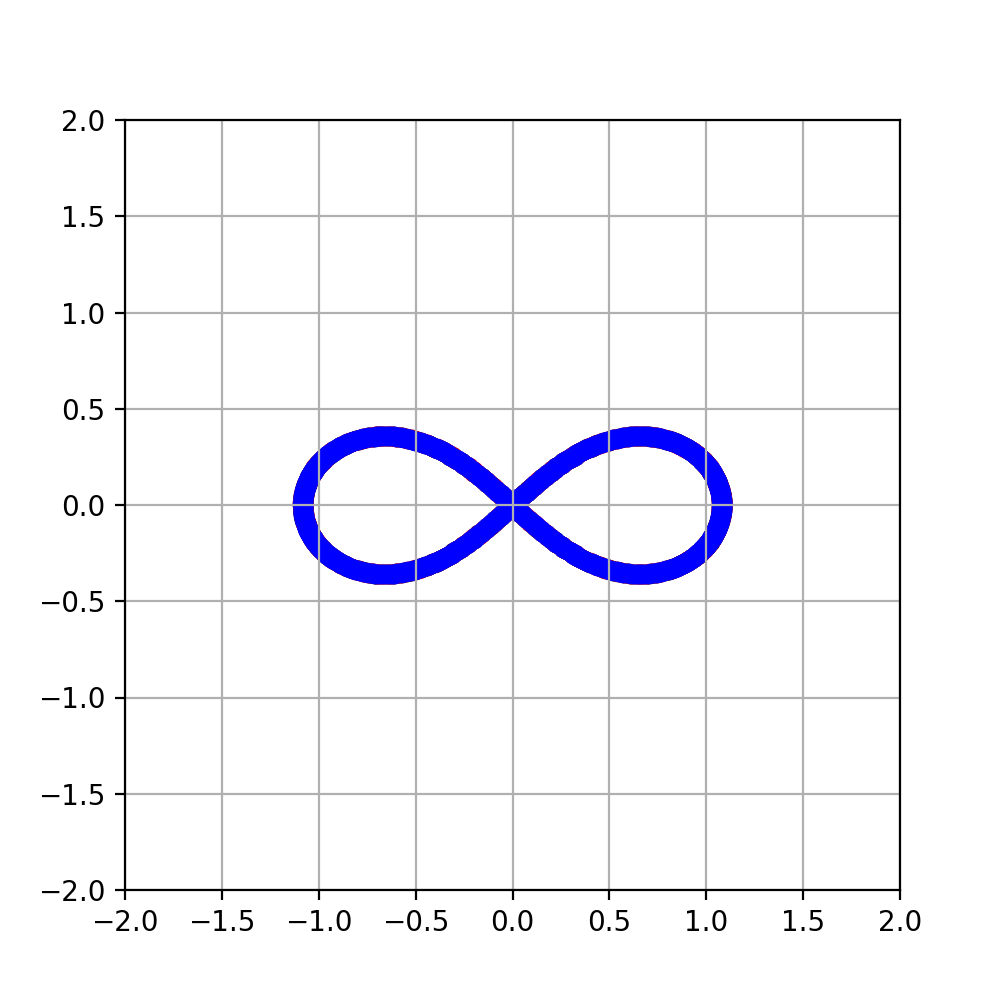

<IPython.core.display.Javascript object>


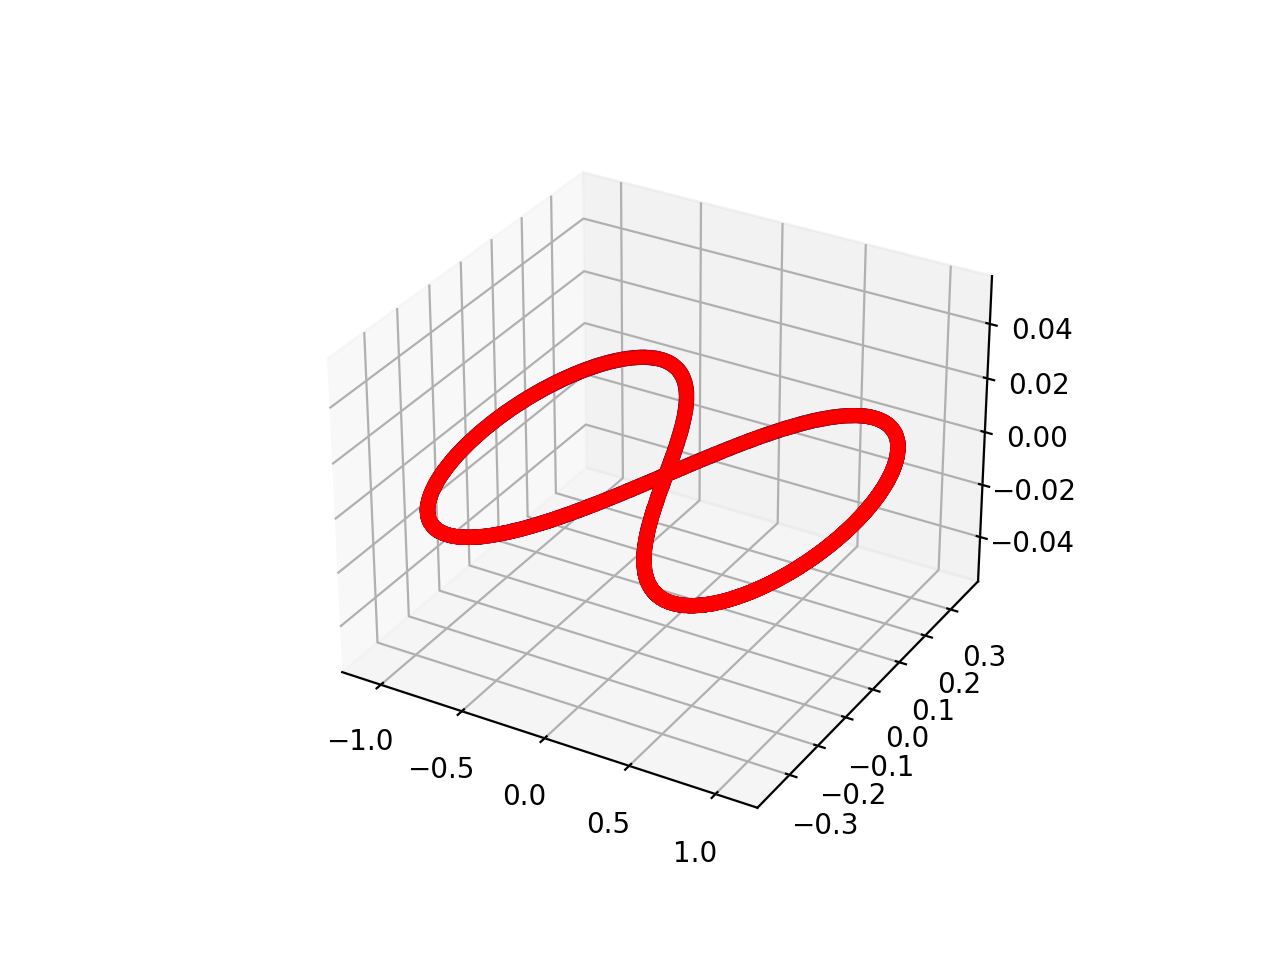

<IPython.core.display.Javascript object>


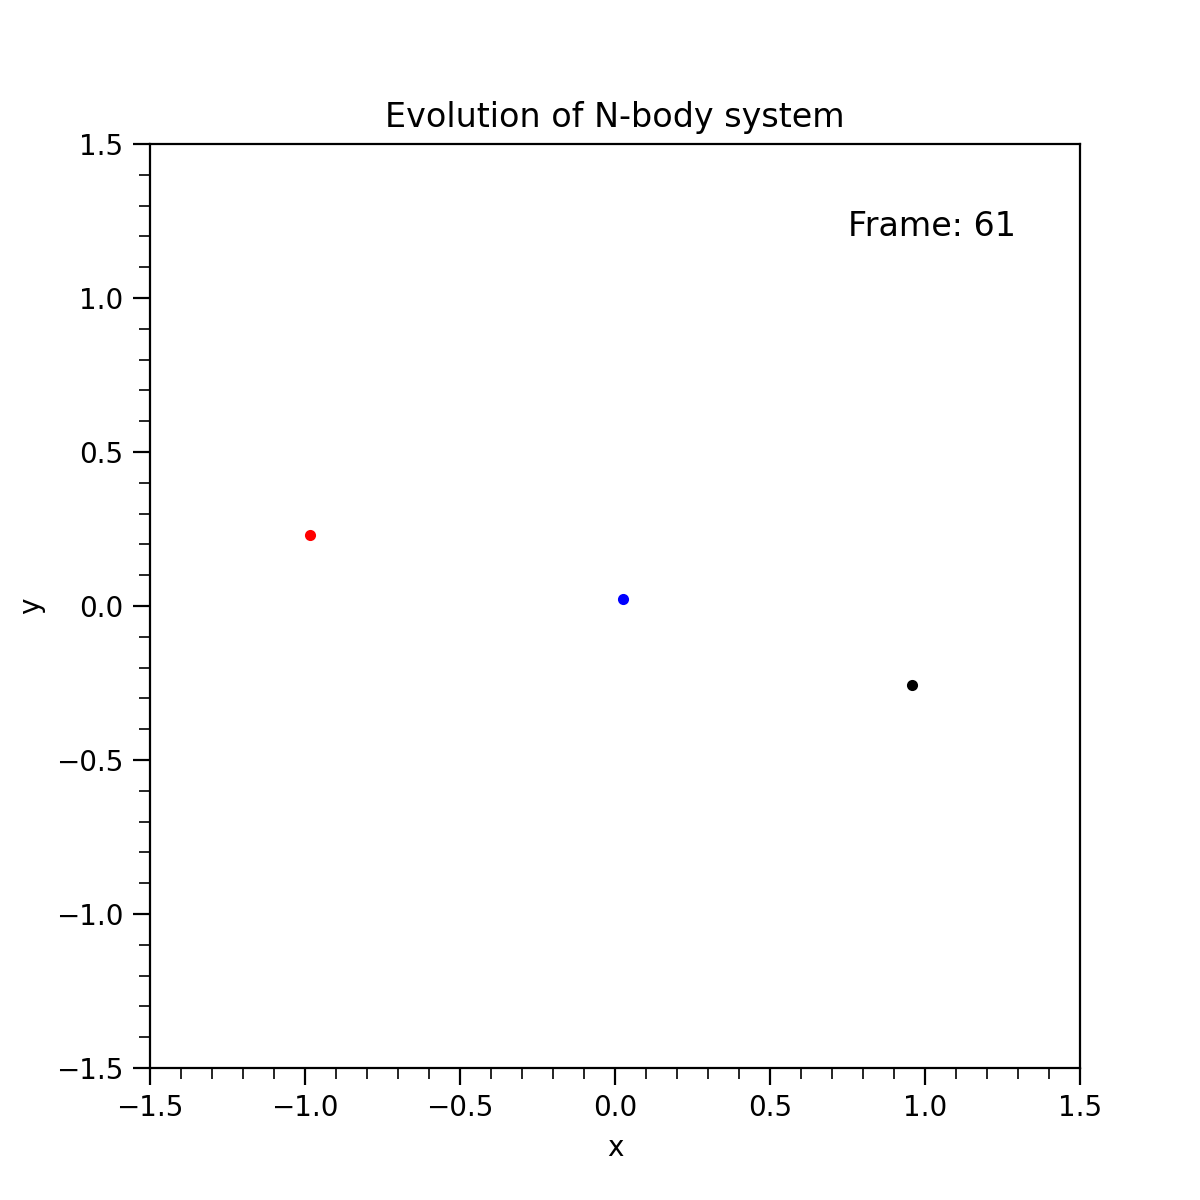

In [27]:
# Libraries
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import os as os
%matplotlib notebook

# File access
path = './'
filename = 'results.txt'

"""
Open the file and read the data
"""

with open(path+filename, 'r') as file:
    n_cols = len(   np.array(file.readline().strip().split()   ).astype(float))
    n_particles = (n_cols-1)//3
    
    times = np.zeros((1000))
    positions = np.zeros((n_particles, 3, 1000))
    
    counter = 0 # Number of lines in the file
    for line in file:
        # Strip whitespace and split by spaces
        data = np.array(line.strip().split()).astype(float)
        times[counter] = data[0]
        for ii in range(n_particles):
            positions[ii, :, counter] = data[(ii*3)+1 : ((ii+1)*3)+1]
        
        counter += 1
        
    times = times[:counter]
    positions = positions[:, :, :counter]
    
print(positions.shape)
    

"""
2D plot
"""
    
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(positions[0, 0, :], positions[0, 1, :], c='k')
ax.scatter(positions[1, 0, :], positions[1, 1, :], c='r')
ax.scatter(positions[2, 0, :], positions[2, 1, :], c='b')    
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.show()
    
"""
3D plot
"""    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[0, 0, :], positions[0, 1, :], positions[0,2,:], c='k')
ax.scatter(positions[1, 0, :], positions[1, 1, :], positions[1,2,:], c='r')
ax.scatter(positions[2, 0, :], positions[2, 1, :], positions[2,2,:], c='b')
plt.show()




"""
2D animation
"""

fig, ax = plt.subplots(1,1, figsize=(6, 6))

# Static elements
ax.set_title('Evolution of N-body system')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.minorticks_on()
ax.tick_params(which='major', labelsize=10, size=6)
ax.tick_params(which='minor', size=4)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

particle1, = ax.plot([], [], 'k.')
particle2, = ax.plot([], [], 'r.')
particle3, = ax.plot([], [], 'b.')

time_text = ax.text(0.75, 0.90, '', transform=ax.transAxes, fontsize=12, color='black')


# Initialize the plot with no data
def init():
    particle1.set_data([], [])  
    particle2.set_data([], []) 
    particle3.set_data([], [])
    return particle1, particle2, particle3

# Update each frame
def update(frame):
    
    particle1.set_data(positions[0, 0, frame], positions[0, 1, frame])
    particle2.set_data(positions[1, 0, frame], positions[1, 1, frame])
    particle3.set_data(positions[2, 0, frame], positions[2, 1, frame])
    
    time_text.set_text(f'Frame: {frame}')  # Update time text
    
    return particle1, particle2, particle3

# Create the animation
ani = FuncAnimation(fig, update, frames=positions.shape[2], init_func=init, blit=True)

# Display the animation
plt.show()